# Assignment_3 Smart health
# Name: Aloukik Aditya
# Student_ID: 1115290

In [29]:
from __future__ import print_function
import tensorflow.compat.v1 as tf
from tensorflow.keras.models import Model 
import tensorflow.keras
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard
#from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras import backend as K
import numpy as np
import matplotlib
import json
from matplotlib import pyplot as plt

from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
import sys
import os
#import cv2 
from PIL import Image
import numpy as np
from skimage.transform import resize
from skimage import data, io, filters
from skimage.transform import rescale
import time
# from tensorflow.keras.layers.normalization import BatchNormalization
from sklearn.model_selection import StratifiedShuffleSplit
from keras.layers.normalization import BatchNormalization

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import pickle
import numpy as np
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [30]:
import glob#---------------------------------------------this helps in reading all the images
Abdomen = glob.glob('DS_NN/DS/Abdomen_CT*.jpeg')
Chest = glob.glob('DS_NN/DS/Chest_CT*.jpeg')
Head = glob.glob('DS_NN/DS/Head_CT*.jpeg')

In [31]:
print(len(Abdomen))#------------------ checking the number of files of each class
print(len(Chest))
print(len(Head))


500
500
500


## this section will create the training and testing sets (very important) ratio is 60:40

In [32]:
data = []
data.clear()
labels = []
labels.clear()
num_classes = 3

for i in Abdomen:   #------------------------------------------------------------------
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', #----------------- using grayscale image
    target_size= (32,32))#--------------------------------------------------using dimension as 32 by 32
    image=np.array(image)
    data.append(image)
    labels.append(0)#---------------------------------------now this the label for abdomen section which is zero
for i in Chest:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (32,32))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in Head:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', 
    target_size= (32,32))
    image=np.array(image)
    data.append(image)
    labels.append(2)

data = np.array(data)#----------------------- it contain all the images of abdomen, chest and head
labels = np.array(labels)#-------------------------this contian all the labels

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.4)#--------------it will randmoly split into training and testing

In [33]:
X_train.shape#-- checking dimension, but our model wont accept this type of dimension

(900, 32, 32)

In [34]:
X_train = np.reshape(X_train,(-1, 32, 32 , 1))#---------so reshaping model
X_test = np.reshape(X_test,(-1, 32, 32 , 1))

In [35]:
ytrain[1:100]

array([1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0])

In [36]:
ytest[1:100]

array([2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2,
       0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [37]:
X_train.shape#-----------------updated shape

(900, 32, 32, 1)

In [38]:
ytrain_encoded = keras.utils.to_categorical(ytrain, num_classes)#-----------------------preprocessing data here
ytest_encoded = keras.utils.to_categorical(ytest, num_classes)

X_train = X_train.astype(np.float32)#---------------------normalizaing the data
X_test = X_test.astype(np.float32)
X_train = X_train / 255
X_test = X_test / 255

In [39]:
X_train.shape

(900, 32, 32, 1)

## Convolution neural network starts here:

In [40]:
featureLayer1=[Conv2D(64, (3, 3), padding='same',input_shape=X_train.shape[1:]),
               Activation('relu'),
               Conv2D(64, (3, 3), padding='same'),#-------------all the the cov layers attain features 
               Activation('relu'),
               MaxPooling2D(pool_size=(2, 2)),
               Dropout(0.25)]

featureLayer2=[Conv2D(128, (3, 3), padding='same'),
               Activation('relu'),
               Conv2D(128, (3, 3), padding='same'),
               Activation('relu'),
               MaxPooling2D(pool_size=(2, 2)),
               Dropout(0.25)]

featureLayer3=[Conv2D(256, (3, 3), padding='same'),
               Activation('relu'),
               Conv2D(256, (3, 3), padding='same'),
               Activation('relu'),
               Conv2D(256, (3, 3), padding='same'),
               Activation('relu'),
               MaxPooling2D(pool_size=(2, 2)),
               Dropout(0.25)]

fullConnLayer=[Flatten(),
               Dense(1024),
               Activation('relu'),
               Dropout(0.5),
               Dense(1024),
               Activation('relu'),
               Dropout(0.5)]

classificationLayer=[Dense(num_classes),
                     Activation('softmax')]

model = Sequential(featureLayer1 + featureLayer2 + featureLayer3 + fullConnLayer + classificationLayer)

In [41]:

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')#----------checking dimentions
print(X_test.shape[0], 'test samples')

x_train shape: (900, 32, 32, 1)
900 train samples
600 test samples


In [42]:

opt = opt = keras.optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,#---------------------------------compiling model here
              metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [43]:
batch_size = 32
epochs = 10#----------------------------------------performance of the model can be increased if epochs are increased
history = model.fit(X_train, ytrain_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,#-----------------------------------------------------starting model here
                    validation_data=(X_test, ytest_encoded),
                    callbacks= [es_cb],
                    shuffle=True)

Epoch 1/10
29/29 [==============================] - 9s 311ms/step - loss: 1.1011 - accuracy: 0.3444 - val_loss: 1.0849 - val_accuracy: 0.5667
Epoch 2/10
29/29 [==============================] - 9s 316ms/step - loss: 0.7051 - accuracy: 0.5722 - val_loss: 0.4885 - val_accuracy: 0.6667
Epoch 3/10
29/29 [==============================] - 9s 315ms/step - loss: 0.4877 - accuracy: 0.6678 - val_loss: 0.4585 - val_accuracy: 0.6833
Epoch 4/10
29/29 [==============================] - 9s 316ms/step - loss: 0.4827 - accuracy: 0.6467 - val_loss: 0.4584 - val_accuracy: 0.6667
Epoch 5/10
29/29 [==============================] - 9s 317ms/step - loss: 1.2211 - accuracy: 0.5067 - val_loss: 1.0999 - val_accuracy: 0.3333
Epoch 6/10
29/29 [==============================] - 9s 324ms/step - loss: 1.0234 - accuracy: 0.4267 - val_loss: 0.9312 - val_accuracy: 0.5217
Epoch 7/10
29/29 [==============================] - 9s 327ms/step - loss: 0.5110 - accuracy: 0.6789 - val_loss: 0.4275 - val_accuracy: 0.6667
Epoch 

In [44]:
score = model.evaluate(X_test, ytest_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16279882192611694
Test accuracy: 0.9916666746139526


In [17]:

# Layers definitions
from keras import backend as K#------------------------this will help to get all info of the layers which we habe in our model
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019E5CB11550>
1 <tensorflow.python.keras.layers.core.Activation object at 0x0000019E5CB38C50>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019E5CB38DA0>
3 <tensorflow.python.keras.layers.core.Activation object at 0x0000019E5DF56048>
4 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019E5DF56198>
5 <tensorflow.python.keras.layers.core.Dropout object at 0x0000019E5DF56320>
6 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019E5DF564A8>
7 <tensorflow.python.keras.layers.core.Activation object at 0x0000019E5DF56710>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000019E5DF56860>
9 <tensorflow.python.keras.layers.core.Activation object at 0x0000019E5DF56AC8>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000019E5DF56C18>
11 <tensorflow.python.keras.layers.core.Dropout object at 0x0000019E5DF56DA0>
12 <tensorflow

In [18]:
inputs_1=model.layers[0].input#------------selecting initial layer
outputs_1=model.layers[26].output#------------according to question selelcting intermediate layer


In [19]:
from keras.layers import Input
# # feature extraction layer
getFeature = K.function([inputs_1],
                         [outputs_1])#----------------------------------getting features from this function

In [20]:
extracted_features_train = getFeature([X_train[:900], 0])[0]#-------------- we need to change to feed into KNN and RF using k function
extracted_features_test = getFeature([X_test[:600], 0])[0]


In [21]:
train_labels = ytrain[:900]
test_labels = ytest[:600]

In [22]:
# output of getFeature function
extracted_features_train[0]#-----------checking values

array([0.        , 0.        , 0.18346983, ..., 0.        , 0.3027268 ,
       0.        ], dtype=float32)

In [23]:
print(extracted_features_train.shape, extracted_features_test.shape, train_labels.shape, test_labels.shape)#----------cheking dimentions

(900, 1024) (600, 1024) (900,) (600,)


## KNN starts below

Maximum accuracy:- 1.0 at K = 1


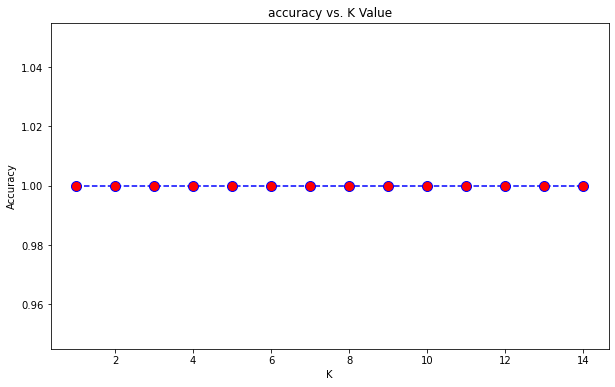

In [24]:
#------------------------------------------------------K nearest neighbour starts here-----------------------------#####
from multiprocessing import Queue
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X_train = extracted_features_train
y_train = train_labels
X_test = extracted_features_test
y_test = test_labels


acc = []
acc.clear()
# Will take some time
from sklearn import metrics
for i in range(1,15):#---------------------------value of k = 1, 3 ,5, 7 included in this
    KNN_model = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    knn_prediction = KNN_model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, knn_prediction))
    
plt.figure(figsize=(10,6))#---------------------------------------used to plot graph as mentioned in question
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)#------------- getting most optimal value of k and accuracy





In [25]:

KNN_filename = '1115290_KNN.pkl'
# Open the file to save as pkl file#------------------saving model for KNN
saved = open(KNN_filename, 'wb')
pickle.dump(KNN_model, saved)
# Close the pickle instances
saved.close()

## Random forest starts below


In [26]:
################_--------------------------------Random forest starts here------------------###################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "n_estimators": [10, 20, 50]}
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(extracted_features_train, train_labels)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [1, 3, 10],
                         'n_estimators': [10, 20, 50]})

In [27]:

rclf = rgclf.best_estimator_
rclf.fit(extracted_features_train, train_labels)

RandomForestClassifier(max_features=1, n_estimators=10)

In [28]:

predicted_RandomForest = rclf.predict(extracted_features_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score#-----------confusion matrix and optimal paramerts are shwon below
print("++++++++++++++Printing Confusion matrix below+++++++++++++++")
print(classification_report(test_labels, predicted_RandomForest))
a = rgclf.best_estimator_
print("Optimal parameteres  -------------->"  , a)
print("Accuracy: {0}".format(accuracy_score(test_labels, predicted_RandomForest)))

++++++++++++++Printing Confusion matrix below+++++++++++++++
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       208

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

Optimal parameteres  --------------> RandomForestClassifier(max_features=1, n_estimators=10)
Accuracy: 1.0


In [29]:

RF_filename = '1115290_RandomForest.pkl'#------------------------saving random forest pkl file
# Open the file to save as pkl file
saved = open(RF_filename, 'wb')
pickle.dump(rclf, saved)
# Close the pickle instances
saved.close()

In [30]:
#--------------------------LOading models here-----------------------------------------

## Models can be loaded from below sections

In [31]:
KNN_m = open(KNN_filename, 'rb')
Knn_load = pickle.load(KNN_m)
print ("Loaded KNN model:: ", Knn_load)




Loaded KNN model::  KNeighborsClassifier(n_neighbors=14)


In [32]:
RF_m = open(RF_filename, 'rb')
RF_load = pickle.load(RF_m)
print ("Loaded RF model:: ", RF_load)






Loaded RF model::  RandomForestClassifier(max_features=1, n_estimators=10)
